In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


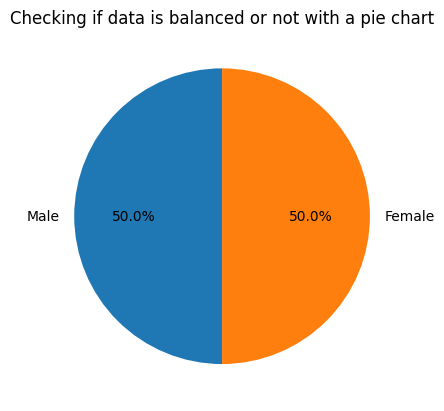

In [7]:
labels = df.Gender.unique()
sizes = [(df.Gender == labels[0]).sum(), (df.Gender == labels[1]).sum()]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle = 90)
plt.title("Checking if data is balanced or not with a pie chart")
plt.show()

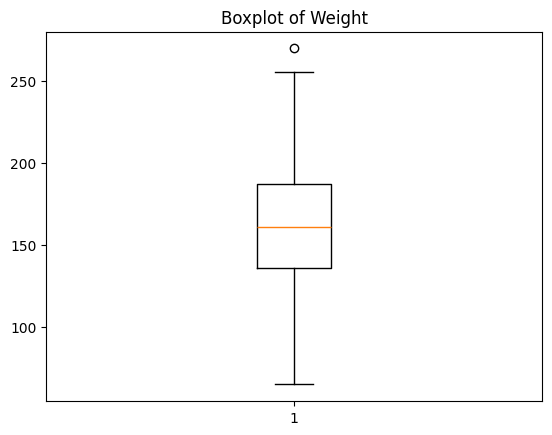

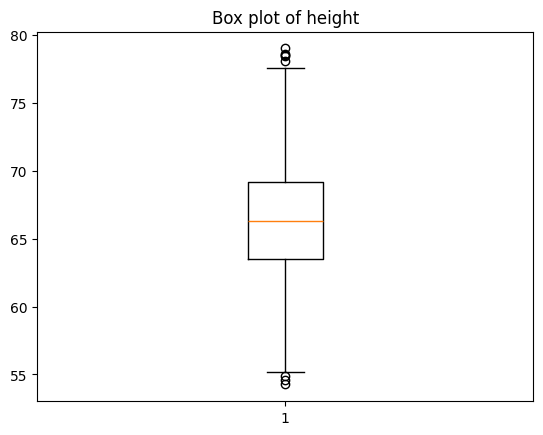

In [10]:
plt.boxplot(df.Weight)
plt.title("Boxplot of Weight")
plt.show()

plt.boxplot(df.Height)
plt.title("Box plot of height")
plt.show()

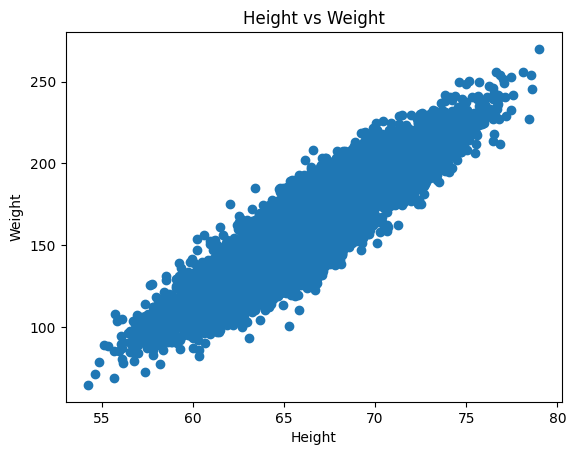

In [11]:
weight = df['Weight']
height = df['Height']
plt.scatter(height, weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height vs Weight")
plt.show()

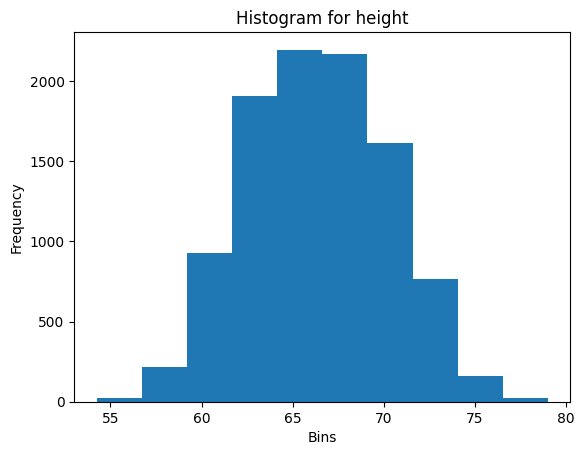

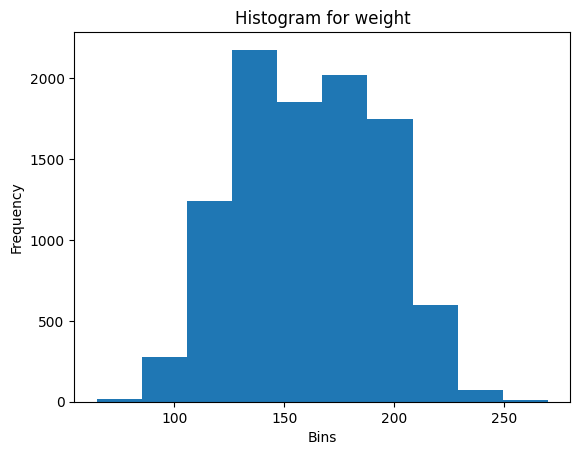

In [12]:
plt.hist(height, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for height')
plt.show()

#histogram for weight
plt.hist(weight, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for weight')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [37]:
x =df.iloc[:,0:2]
y = df.iloc[:,2]

In [39]:
y

0        True
1        True
2        True
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Gender_Male, Length: 10000, dtype: bool

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [41]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Loop through the classifiers, train them, and evaluate
for name, tlf in classifiers.items():
    tlf.fit(x_train, y_train)               # Train the model
    y_pred = tlf.predict(x_test)            # Make predictions
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    print(f"{name} accuracy: {accuracy:.2f}")

Decision Tree accuracy: 0.88
Support Vector Machine accuracy: 0.92
k-Nearest Neighbors accuracy: 0.90
Naive Bayes accuracy: 0.88


In [42]:
clf = SVC()
clf.fit(x_train,y_train)

SVC()

In [43]:
y_pred = clf.predict(x_test)

In [44]:
ac = accuracy_score(y_test,y_pred)
ac

0.916

In [46]:
import pickle 
with open("model.pkl", "wb") as file:
    pickle.dump(clf, file)